# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Manthan Patel
*   Your **student number**: 1008247933



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [25]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [26]:
#Printing the dataframe
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [27]:
#Splitting the data

from sklearn.model_selection import train_test_split

#Splitting data of both class mixed
X_train, X_remaining, y_train, y_remaining = train_test_split(df[df.columns[:40]],df.get('Goal'), train_size=0.7 , random_state = 1)
X_val,X_test,y_val,y_test = train_test_split(X_remaining,y_remaining,test_size = 0.5, random_state = 1)

In [28]:
#Standardisation change

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_val_std = scaler.transform(X_val)

y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_val=y_val.to_numpy()

In [29]:
#Inserting Column of Ones

X_train_std = np.insert(X_train_std, 0, np.array([1 for a in range(X_train_std.shape[0])]), axis=1)
X_test_std = np.insert(X_test_std, 0, np.array([1 for a in range(X_test_std.shape[0])]), axis=1)
X_val_std = np.insert(X_val_std, 0, np.array([1 for a in range(X_val_std.shape[0])]), axis=1)

**Difference between Epoch and Iteration for SGD and Mini batch GD**


*   Iteration : Each time we update the weights is called Iteration.
*   Epoch : Each time the model learns the whole dataset is called an Epoch.


*   Stochastic GD : Each sample is considered as one batch, so total there will be N iterations (considering there are N samples) and one Epoch will take N iterations.

*   Mini batch GD : Whole dataset is divided into K small batchs, for each batch one iteration is done so one Epoch will take K iterations.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [30]:
#Direct solution calculation 

from scipy import linalg
from sklearn.metrics import mean_squared_error

D_Weights = np.dot(linalg.inv(np.dot(X_train_std.T,X_train_std)),np.dot(X_train_std.T,y_train))
y_pred_train = np.dot(X_train_std,D_Weights)
y_pred_val = np.dot(X_val_std,D_Weights)

#Calculating RMSE for Training and Validation Sets
RMSE_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
RMSE_val = np.sqrt(mean_squared_error(y_pred_val, y_val))

print("RMSE for Training set is:",RMSE_train)
print("RMSE for Validation set is:",RMSE_val)

RMSE for Training set is: 0.00017707758079743764
RMSE for Validation set is: 0.00017415588907568788


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [31]:
#Gradient Descent

import time
import matplotlib.pyplot as plt
from numpy import random

start_time = time.time()
count = 0
epoch_GD = []
CT = 1.001*RMSE_val
RMSE_GD_train_list = []
RMSE_GD_val_list = []
learning_rate = 0.01
#Weights = np.array([0.001 for a in range(X_train_std.shape[1])])
Weights = np.arange(911,952,1)/10000000
for epoch in range(50000):
    y_pred_train = np.dot(X_train_std,Weights.T)
    y_pred_val = np.dot(X_val_std,Weights.T)
    count += 1
    epoch_GD.append(count)
    RMSE_GD_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
    RMSE_GD_val = np.sqrt(mean_squared_error(y_pred_val, y_val))
    RMSE_GD_train_list.append(RMSE_GD_train)
    RMSE_GD_val_list.append(RMSE_GD_val)
    gradient = (1/y_pred_train.shape[0]) * np.dot(X_train_std.T, (y_pred_train-y_train))
    Weights -= learning_rate*gradient
    if RMSE_GD_val >= 1.001*RMSE_val:
      continue
    else:
      print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
      break

--- Total Training Time: 0.6610162258148193 (s) ---


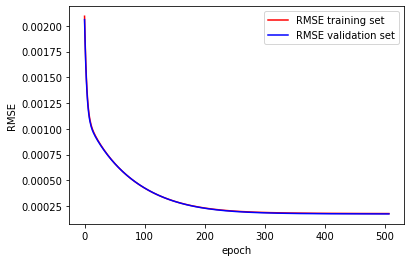

In [32]:
#Plotting the RMSE

plt.plot(RMSE_GD_train_list, 'r',label='RMSE training set')
plt.plot(RMSE_GD_val_list, 'b',label='RMSE validation set')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**From the Plot we can observe that plot is a good fit curve. It is neither overfit nor underfit as Training and Validation errors are decreasing maintaining minimal gap with each other.**

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [33]:
#mini-batch gradient descent
def mini_batch(X_train,X_val,y_train,y_val,batch_size,learning_rate,CT):
    start_time = time.time()
    count = 0
    epoch_list = []
    RMSE_train_list = []
    RMSE_val_list = []
    elapsed_time = []
    Weights = np.arange(911,952,1)/10000000
    Weight_list = []
    RMSE_val = 2  ###  taking first random value for RMSE
    c = 1
    while RMSE_val >= CT : ###Checking convergence threshold
        
        data_train = np.hstack((X_train, y_train.reshape(-1,1)))  
        data_train = np.random.permutation(data_train)
        X_train = data_train[:,:-1]
        y_train = data_train[:,-1]

        #running mini batch iterations on training set
        for m in range((X_train.shape[0]//batch_size)):
            X_mini_train = X_train[m*batch_size:(m+1)*batch_size,:]
            y_mini_train = y_train[m*batch_size:(m+1)*batch_size]
            y_pred_train = np.dot(X_mini_train,Weights.T)
            RMSE_train = np.sqrt(mean_squared_error(y_pred_train, y_mini_train))
            gradient = (1/batch_size * np.dot(X_mini_train.T, (y_pred_train-y_mini_train)))  
            Weights -= learning_rate*gradient

        y_pred_val = np.dot(X_val,Weights.T)
        RMSE_val = np.sqrt(mean_squared_error(y_pred_val, y_val))
        elapsed_time.append(time.time()-start_time)
        count += 1
        epoch_list.append(count)
        RMSE_train_list.append(RMSE_train)
        RMSE_val_list.append(RMSE_val)
        #print(RMSE_val)
        Weight_list = Weights
        #Checking convergence
        if len(epoch_list)>4 and ((RMSE_val_list[-5]+RMSE_val_list[-4]+RMSE_val_list[-3]+RMSE_val_list[-2])/4)<RMSE_val_list[-1]:
            print("Batch-size of %.d is Invalid as RMSE is not converging" % batch_size)
            RMSE_train_list, RMSE_val_list, elapsed_time, Weight_list = 0,0,0,0
            c = 0
            break
    return RMSE_train_list, RMSE_val_list, elapsed_time, Weight_list, epoch_list, c

Batch-size of 2 is Invalid as RMSE is not converging
Batch-size of 4 is Invalid as RMSE is not converging
Batch-size of 8 is Invalid as RMSE is not converging
Batch-size of 16 is Invalid as RMSE is not converging
Batch-size of 32 is Invalid as RMSE is not converging
Batch-size of 64 is Invalid as RMSE is not converging


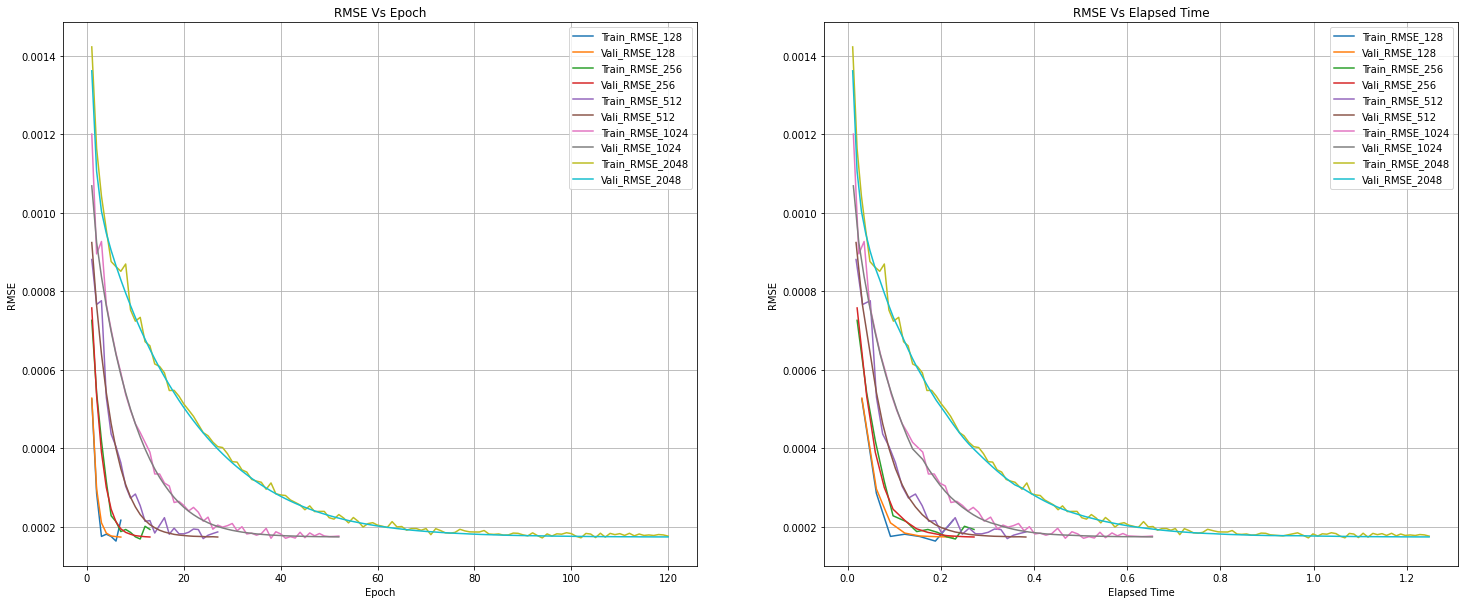

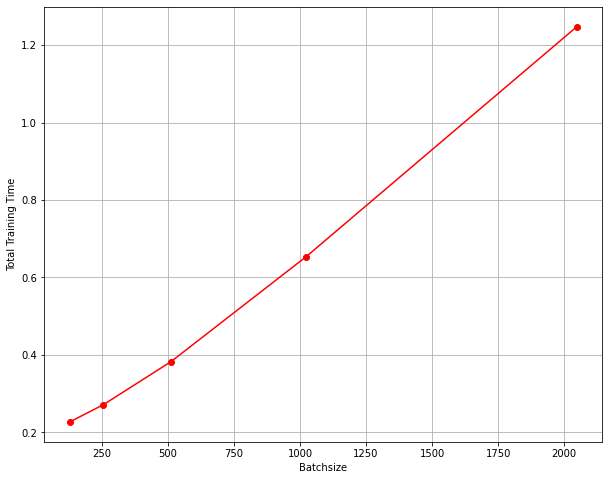

In [34]:
figs, axs = plt.subplots(1,2,figsize=(25,10))
Total_time_list = []
Batchsize_converge = []
for k in range(1,12):
  Minibatch_result = mini_batch(X_train_std,X_val_std,y_train,y_val,2**k,0.01,1.001*0.00017443831573583636)
  if Minibatch_result[5] !=0:
    axs[0].plot(Minibatch_result[4],Minibatch_result[0],label='Train_RMSE_%d'%2**k)
    axs[0].plot(Minibatch_result[4],Minibatch_result[1],label='Vali_RMSE_%d'%2**k)
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("RMSE")
    axs[0].legend()
    axs[0].grid()
    axs[0].title.set_text('RMSE Vs Epoch')

    axs[1].plot(Minibatch_result[2],Minibatch_result[0],label='Train_RMSE_%d'%2**k)
    axs[1].plot(Minibatch_result[2],Minibatch_result[1],label='Vali_RMSE_%d'%2**k)
    axs[1].set_xlabel("Elapsed Time")
    axs[1].set_ylabel("RMSE")
    axs[1].legend()
    axs[1].grid()
    axs[1].title.set_text('RMSE Vs Elapsed Time')
    Total_time_list.append(Minibatch_result[2][-1])
    Batchsize_converge.append(2**k)
plt.figure(figsize=(10,8))
plt.plot(Batchsize_converge,Total_time_list,color='red',marker='o')
plt.xlabel('Batchsize')
plt.ylabel('Total Training Time')  
plt.grid() 
plt.show()

**Observations**

*   From first plot of RMSE Vs. Epoch curve it can be noticed that smaller batchsizes will take less Epoch to reach convergence threshold.
*   Elasped time will also be less for smaller batch sizes, which is observed in Plot-2.


*   Total training time is increasing with Increaing number of batchsize.

*   We can notice somewhat gap in Training and Validation curves but it is not large so we can say that it is a good fit.





## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [35]:
#mini-batch gradient descent with momentum
def mini_batch_momentum(X_train,X_val,y_train,y_val,batch_size,learning_rate,CT,b):
    start_time = time.time()
    count = 0
    epoch_list = []
    RMSE_train_list = []
    RMSE_val_list = []
    elapsed_time = []
    Weights = np.arange(911,952,1)/10000000
    Weight_list = []
    RMSE_val = 2  ###  taking first random value for RMSE
    c = 1
    gradient_list = [0]
    while RMSE_val >= CT : ###Checking convergence threshold
        
        data_train = np.hstack((X_train, y_train.reshape(-1,1)))  
        data_train = np.random.permutation(data_train)
        X_train = data_train[:,:-1]
        y_train = data_train[:,-1]

        #running mini batch iterations on training set
        for m in range((X_train.shape[0]//batch_size)):
            X_mini_train = X_train[m*batch_size:(m+1)*batch_size,:]
            y_mini_train = y_train[m*batch_size:(m+1)*batch_size]
            y_pred_train = np.dot(X_mini_train,Weights.T)
            RMSE_train = np.sqrt(mean_squared_error(y_pred_train, y_mini_train))
            gradient =(b*gradient_list[-1])+(1-b)*(1/batch_size * np.dot(X_mini_train.T, (y_pred_train-y_mini_train)))  
            gradient_list.append(gradient)
            Weights -= learning_rate*gradient

        y_pred_val = np.dot(X_val,Weights.T)
        RMSE_val = np.sqrt(mean_squared_error(y_pred_val, y_val))
        elapsed_time.append(time.time()-start_time)
        count += 1
        epoch_list.append(count)
        RMSE_train_list.append(RMSE_train)
        RMSE_val_list.append(RMSE_val)
        #print(RMSE_val)
        Weight_list = Weights
        #Checking convergence
        if len(epoch_list)>4 and ((RMSE_val_list[-5]+RMSE_val_list[-4]+RMSE_val_list[-3]+RMSE_val_list[-2])/4)<RMSE_val_list[-1]:
            print("Batch-size of %.d is Invalid as RMSE is not converging" % batch_size)
            RMSE_train_list, RMSE_val_list, elapsed_time, Weight_list = 0,0,0,0
            c = 0
            break
    return RMSE_train_list, RMSE_val_list, elapsed_time, Weight_list, epoch_list, c

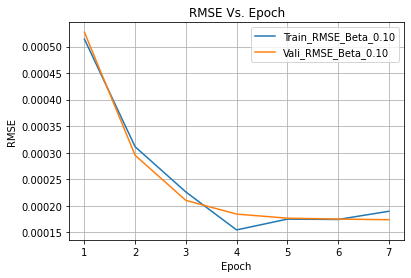

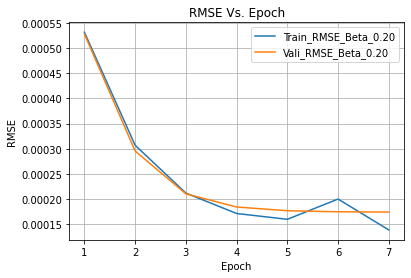

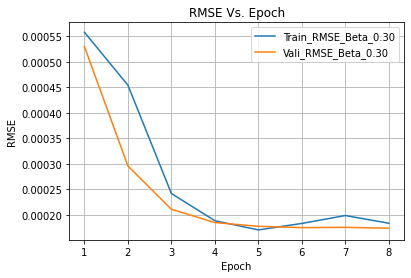

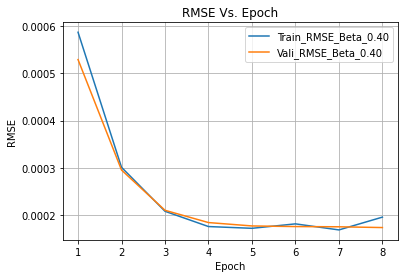

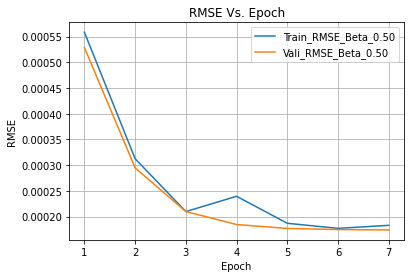

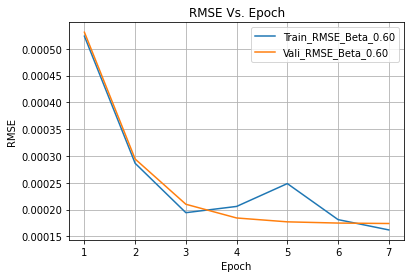

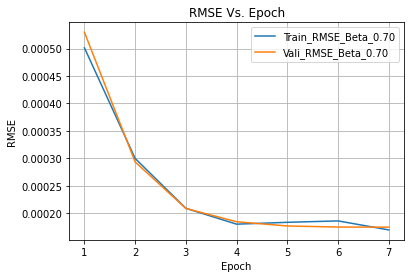

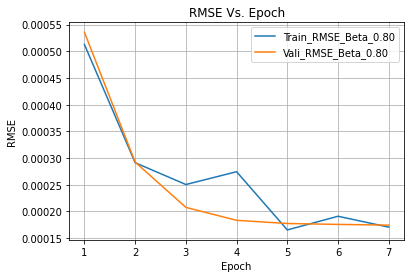

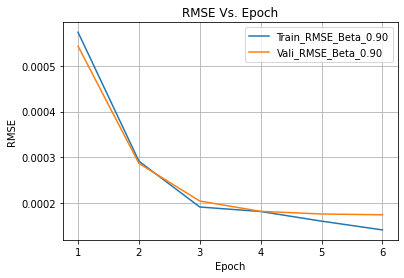

In [45]:
Time_list = []
for h in np.arange(0.1,1.0,0.1):
  Minibatch_momentum = mini_batch_momentum(X_train_std,X_val_std,y_train,y_val,128,0.01,0.00017461275,h)
  Time_list.append(Minibatch_momentum[2][-1])
  plt.plot(Minibatch_momentum[4],Minibatch_momentum[0],label='Train_RMSE_Beta_%.2f'%h)
  plt.plot(Minibatch_momentum[4],Minibatch_momentum[1],label='Vali_RMSE_Beta_%.2f'%h)
  plt.title('RMSE Vs. Epoch')
  plt.legend()
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.grid()
  plt.show()  

In [46]:
#Plotting table for checking change in training time with momentum
d1 = pd.DataFrame(data={'Total Training Time':Time_list,'Momentum Value':np.arange(0.1,1.0,0.1)})
d1

,Total Training Time,Momentum Value
0,0.223993,0.1
1,0.221315,0.2
2,0.256919,0.3
3,0.252260,0.4
4,0.233929,0.5
5,0.241099,0.6
6,0.225739,0.7
7,0.227991,0.8
8,0.192099,0.9


**Summary**


*   Applying momentum in minibatch GD function we got reduced training time as earlier training time was reaching around 2s, in case of momentum it reduced to 0.2-0.3 sec
*   As we increase value of beta from 0.1 to 0.9 training time improves much as we are getting our best time near 0.8-0.9 value range of beta.


*   From plots we can see that Graidents is getting calculated very well as RMSE is getting reduces very quickly in initial stages.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

**Model Selection**


*   From our calculations of abovve parts we can say that beta value of 0.9 is ideal in this case as it gives us least training time.
*   Batch size of 128 is ideal for our case it is taking less time for training, batchsize less than 128 are not getting converged as RMSE for those batchsizes is getting increased more and more.



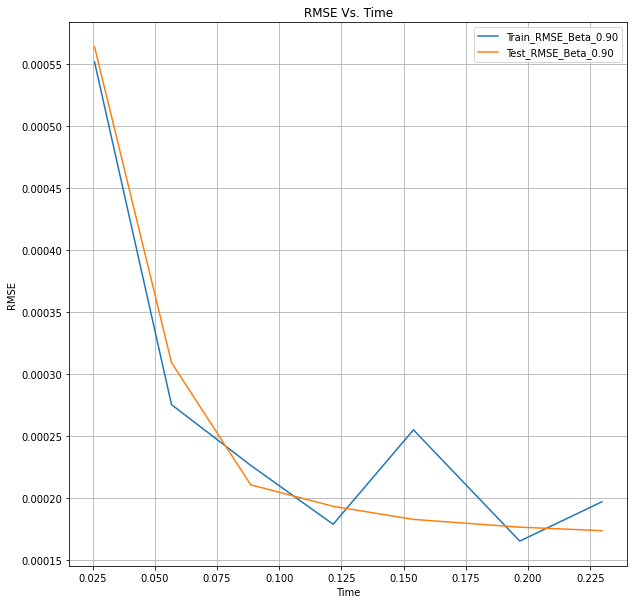

In [38]:
Final_test = mini_batch_momentum(X_train_std,X_test_std,y_train,y_test,128,0.01,0.00017461275,0.9)
 

plt.figure(figsize=(10,10))
plt.plot(Final_test[2],Final_test[0],label='Train_RMSE_Beta_%.2f'%h)
plt.plot(Final_test[2],Final_test[1],label='Test_RMSE_Beta_%.2f'%h)
plt.title('RMSE Vs. Time')
plt.legend()
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.grid()
plt.show() 

**Test Performance**


*   From the Plot we can see that there is not much difference in Training and Testing curves so we can say that model is getting trained very quickly.
*   Here training time is very less, as we have control system here so we can say that controlling of ailerons will be quick which is good for us.

